In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager


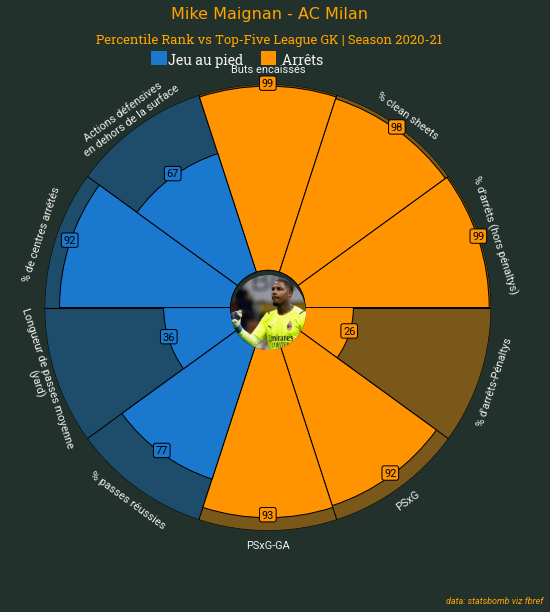

In [3]:

font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto%5Bwdth,wght%5D.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/"
                           "Roboto-Italic%5Bwdth,wght%5D.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/robotoslab/"
                         "RobotoSlab%5Bwght%5D.ttf?raw=true"))



# Importation de l'image
Maignan = Image.open("D:/Images/Maignan_2.png")
# Liste des paramètres
GK_params = ["Buts encaissés", "% clean sheets", "% d'arrêts (hors pénaltys)", "% d'arrêts-Pénaltys", "PSxG", "PSxG-GA",
          "% passes réussies", "Longueur de passes moyenne \n(yard)", "% de centres arrétés",
          "Actions défensives \nen dehors de la surface"]
Maignan_values = [99, 98, 99, 26, 92, 93, 77, 36, 92, 67]

# Couleur pour les parts (de pizza)
slice_colors = ["#FF9300"] * 6 + ["#1a78cf"] * 4  # 6 tranches en orange + 4 tranches en bleu

# Couleur du texte
text_colors = ["black"] * 10  # valeurs : noir pour toutes les tranches

baker = PyPizza(
    params=GK_params,                  # list of parameters
    background_color="#22312b",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color="#000000",    # color for last line
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)
# plot pizza
fig, ax_1 = baker.make_pizza(
    Maignan_values,                          # list of values
    figsize=(8, 8.5),                # adjust the figsize according to your need
    color_blank_space="same",        # use the same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
    edgecolor="black", zorder=2, linewidth=1),   # edgecolor = couleur du bord des parts
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),  # values to be used when adding parameter labels
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values labels

)
fig.text(
    0.515, 0.935,
    "Percentile Rank vs Top-Five League GK | Season 2020-21",
    size=13,
    ha="center", fontproperties=font_bold.prop, color="orange"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"

fig.text(
    0.99, 0.02, f"{CREDIT_1}", size=9,
    fontproperties=font_italic.prop, color="orange",
    ha="right"
)

# add text
fig.text(
    0.34, 0.9, "Jeu au pied           Arrêts", size=14,
    fontproperties=font_bold.prop, color="#F2F2F2"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.5, 0.9), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    )
])

# add title
fig.text(
    0.515, 0.975, "Mike Maignan - AC Milan", size=16,
    ha="center", color="orange"
)
# add image
ax_image_1 = add_image(
    Maignan, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
)   # these values might differ when you are plotting

